## Example of using Probabilistic Roadmap Star from GenNav

This is a tutorial about using the probabilistic roadmap star code to plan a path between two states in our configuration space. We will be using A* search algorithm to find the optimal path along the graph constructed by the PRM Star algorithm.

### Setup

Let us first import all the classes and utilities needed from the gennav package. 

In [1]:
from gennav.envs import PolygonEnv  # imports polygon environment
from gennav.envs.common import visualize_path
from gennav.planners.prm.prmstar import (
    PRMStar,  # imports Probabilistic Roadmap-Star class from the planers
)
from gennav.utils import RobotState
from gennav.utils.geometry import Point
from gennav.utils.samplers import UniformRectSampler
from gennav.utils.visualisation import visualize_graph

Some of the parameters and variables used are:

general_obstacle_list: obstacles in shapely defined by their vertices.

sampler = UniformRectSampler(): samples points in the sample area (here: -5 < x < 15 and -5 < y < 15)

c = constant for radius determination

n = total no. of nodes to be sampled in sample_area

### Using PRM Star to plan the path:

In [2]:
def prmstar_plan():
    general_obstacles_list = [
        [[(8, 5), (7, 8), (2, 9), (3, 5)], [(3, 3), (3, 5), (5, 5), (5, 3)]],
        [
            [(2, 10), (7, 10), (7, 1), (6, 1), (6, 6), (4, 6), (4, 9), (2, 9)],
            [(4, 0), (4, 5), (5, 5), (5, 0)],
            [(8, 2), (8, 7), (10, 7), (10, 2)],
        ],
    ]

    sampler = UniformRectSampler(-5, 15, -5, 15)
    polygon = PolygonEnv()
    start = RobotState(position=Point(0, 0))
    goal = RobotState(position=Point(12, 10))

    my_prmstar = PRMStar(sampler=sampler, c=30, n=100)

    # Plan a path using the PRMStar.plan method for each obstacle:
    for obstacles in general_obstacles_list:
        polygon.update(obstacles)  # updates the environment with the obstacle
        path = my_prmstar.plan(start, goal, polygon)

        visualize_path(path, polygon)

        if len(path.path) != 1:  # check if the path has only the start state
            assert polygon.get_traj_status(path) is True

/home/sruj/robotics/gennav/gennav/envs/common.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


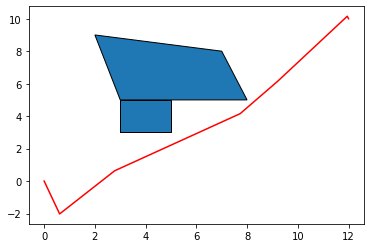

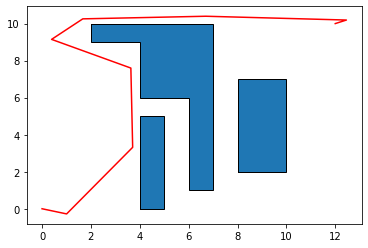

In [3]:
prmstar_plan()

### Using PRM Star to plan the path:

In [4]:
def prmstar_construct():
    general_obstacles_list = [
        [[(8, 5), (7, 8), (2, 9), (3, 5)], [(3, 3), (3, 5), (5, 5), (5, 3)]],
        [
            [(2, 10), (7, 10), (7, 1), (6, 1), (6, 6), (4, 6), (4, 9), (2, 9)],
            [(4, 0), (4, 5), (5, 5), (5, 0)],
            [(8, 2), (8, 7), (10, 7), (10, 2)],
        ],
    ]

    sampler = UniformRectSampler(-5, 15, -5, 15)
    polygon = PolygonEnv()
    my_prmstar = PRMStar(sampler=sampler, c=30, n=50)

    # Construct a graph in the configuration space of each obstacle using the PRMStar.construct method:
    for obstacles in general_obstacles_list:
        polygon.update(obstacles)  # updates the environment with the obstacle
        graph = my_prmstar.construct(polygon)  # noqa: F841

        visualize_graph(graph, polygon)

/home/sruj/robotics/gennav/gennav/utils/visualisation.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


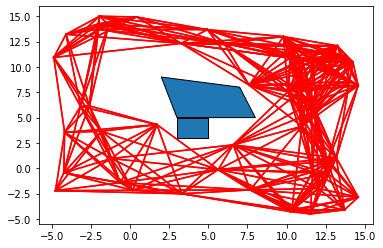

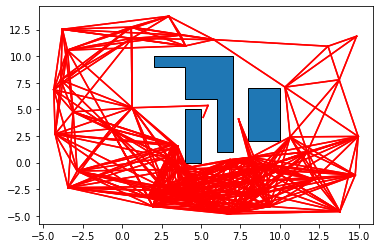

In [5]:
prmstar_construct()